## Curso de Inteligencia Artificial

### Algoritmos de aprendizaje por Refuerzo





#### Librerías necesarias

In [ ]:
!sudo apt-get install -y xvfb ffmpeg 
!pip install gym
!pip install 'imageio==2.4.0'
!pip install PILLOW
!pip install 'pyglet==1.5.0'
!pip install pyvirtualdisplay

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


### Política de búsqueda aleatoria

Empezamos con algunas políticas más complejas para resolver el problema CartPole que las acciones puramente aleatorias. 

Un enfoque simple, pero efectivo, es mapear una observación en un vector de dos números que representan dos acciones. Se seleccionará la acción con el valor más alto. El mapeo lineal está representado por una matriz de peso cuyo tamaño es $4 \times 2$ ya que las observaciones son 4-dimensionales en este caso. En cada episodio, el peso se genera aleatoriamente y se usa para calcular la acción para cada paso de este episodio. Luego se calcula la recompensa total. 

Este proceso se repite para muchos episodios y al final, el peso que permite la recompensa total más alta se convertirá en la política aprendida.  

In [ ]:
import gym
import torch

env = gym.make('CartPole-v0')
n_estado = env.observation_space.shape[0]
n_accion = env.action_space.n

def correr_episodio(env, peso):
  estado = env.reset()
  recompensa_total = 0
  realizado = False
  while not realizado:
    estado = torch.from_numpy(estado).float()
    accion = torch.argmax(torch.matmul(estado, peso))
    estado, recompensa, realizado, _ = env.step(accion.item())
    recompensa_total += recompensa
  return recompensa_total



n_episodio = 1000
mejor_recompensa_total = 0
mejor_peso = None

recompensas_totales = []

for episodio in range(n_episodio):
  peso = torch.rand(n_estado, n_accion)
  recompensa_total = correr_episodio(env, peso)
  print('Episodio {}: {}'.format(episodio+1, recompensa_total))
  if recompensa_total > mejor_recompensa_total:
    mejor_peso = peso
    mejor_recompensa_total = recompensa_total
  recompensas_totales.append(recompensa_total)

print('Recompensa total promedio por {} episodio: {}'.format(n_episodio, sum(recompensas_totales) / n_episodio))

Episodio 1: 9.0
Episodio 2: 11.0
Episodio 3: 164.0
Episodio 4: 79.0
Episodio 5: 73.0
Episodio 6: 200.0
Episodio 7: 27.0
Episodio 8: 8.0
Episodio 9: 20.0
Episodio 10: 145.0
Episodio 11: 9.0
Episodio 12: 10.0
Episodio 13: 45.0
Episodio 14: 9.0
Episodio 15: 10.0
Episodio 16: 93.0
Episodio 17: 9.0
Episodio 18: 10.0
Episodio 19: 187.0
Episodio 20: 57.0
Episodio 21: 200.0
Episodio 22: 10.0
Episodio 23: 63.0
Episodio 24: 168.0
Episodio 25: 8.0
Episodio 26: 9.0
Episodio 27: 9.0
Episodio 28: 8.0
Episodio 29: 95.0
Episodio 30: 11.0
Episodio 31: 25.0
Episodio 32: 26.0
Episodio 33: 21.0
Episodio 34: 10.0
Episodio 35: 22.0
Episodio 36: 37.0
Episodio 37: 25.0
Episodio 38: 200.0
Episodio 39: 40.0
Episodio 40: 200.0
Episodio 41: 20.0
Episodio 42: 33.0
Episodio 43: 9.0
Episodio 44: 9.0
Episodio 45: 10.0
Episodio 46: 11.0
Episodio 47: 74.0
Episodio 48: 63.0
Episodio 49: 9.0
Episodio 50: 8.0
Episodio 51: 9.0
Episodio 52: 36.0
Episodio 53: 78.0
Episodio 54: 200.0
Episodio 55: 200.0
Episodio 56: 9.0
Episod

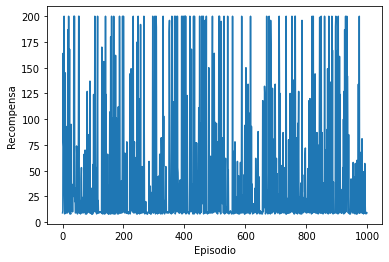

In [ ]:
import matplotlib.pyplot as plt
plt.plot(recompensas_totales)
plt.xlabel('Episodio')
plt.ylabel('Recompensa')
plt.show()

### Ejercicios

Escribe líneas  de código para ver cómo funciona la política aprendida en $100$ episodios nuevos.

In [ ]:
## Tu respuesta

Implementa el algoritmo **Hill climbing**, de manera que podamos lograr un rendimiento mucho mejor que con una política de búsqueda aleatoria simplemente agregando ruido adaptativo a cada episodio. 

Referencia: [Introduction to Hill Climbing | Artificial Intelligence](https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/).

In [ ]:
## Tu solucion

### Política de gradiente de Monte Carlo

En el algoritmo de políticas de gradiente, el peso del modelo se mueve en la dirección del gradiente al final de cada episodio.

Además, en cada paso, se muestra una acción de la política en función de las probabilidades calculadas utilizando el estado y el peso. Ya no realiza una acción con certeza, a diferencia de la búsqueda aleatoria y hill climbing (al realizar la acción que obtiene la puntuación más alta. Por tanto, la política cambia de determinista a estocástica.

El algoritmo entrena a un agente dando pequeños pasos y actualizando el peso según las recompensas asociadas con esos pasos al final de un episodio. La técnica de hacer que el agente ejecute un episodio completo y luego actualizar la política en función de las recompensas obtenidas se denomina política de Monte Carlo.

La acción se selecciona en función de la distribución de probabilidad calculada según el estado actual y el peso del modelo. Por ejemplo, si las probabilidades para las acciones izquierda y derecha son `[0,6, 0,4]`, esto significa que la acción izquierda se selecciona el $60\%$ del tiempo y no significa que se elija la acción de la izquierda.

Si la recompensa es $1$ por cada paso antes de que finalice un episodio. La recompensa futura que usamos para calcular la política de gradiente en cada paso es el número de pasos restantes. Después de cada episodio, alimentamos el historial de gradientes multiplicado por las recompensas futuras para actualizar el peso utilizando el método de ascenso de gradiente estocástico. De esta forma, cuanto más largo sea un episodio, mayor será la actualización del peso.

Esto eventualmente aumentará la posibilidad de obtener una recompensa total mayor.

In [ ]:
import torch
import gym

env = gym.make('CartPole-v0')

n_estado = env.observation_space.shape[0]
n_accion = env.action_space.n

def correr_episodio(env, peso):
  estado = env.reset()
  grads = []
  recompensa_total = 0
  realizado = False
  while not realizado:
    estado = torch.from_numpy(estado).float()
    z = torch.matmul(estado, peso)
    probs = torch.nn.Softmax()(z)
    accion = int(torch.bernoulli(probs[1]).item())
    d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
    d_log = d_softmax[accion] / probs[accion]
    grad = estado.view(-1, 1) * d_log
    grads.append(grad)
    estado, recompensa, realizado, _ = env.step(accion)
    recompensa_total += recompensa
    if realizado:
      break
  return recompensa_total, grads

n_episodios = 1000
tasa_aprendizaje = 0.001

recompensas_totales = []
peso = torch.rand(n_estado, n_accion)

for episodio in range(n_episodios):
  recompensa_total, gradientes = correr_episodio(env, peso)
  print('Episodio {}: {}'.format(episodio + 1, recompensa_total))
  for i, gradiente in enumerate(gradientes):
    peso += tasa_aprendizaje * gradiente * (recompensa_total - i)
  recompensas_totales.append(recompensa_total)

print('Recompensa total promedio por {} episodio: {}'.format(n_episodios, sum(recompensas_totales)/n_episodios))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Episodio 1: 28.0
Episodio 2: 43.0
Episodio 3: 35.0
Episodio 4: 17.0
Episodio 5: 49.0
Episodio 6: 29.0
Episodio 7: 38.0
Episodio 8: 49.0
Episodio 9: 35.0
Episodio 10: 19.0
Episodio 11: 30.0
Episodio 12: 31.0
Episodio 13: 30.0
Episodio 14: 30.0
Episodio 15: 45.0
Episodio 16: 32.0
Episodio 17: 84.0
Episodio 18: 67.0
Episodio 19: 50.0
Episodio 20: 38.0
Episodio 21: 36.0
Episodio 22: 41.0
Episodio 23: 66.0
Episodio 24: 67.0
Episodio 25: 37.0
Episodio 26: 45.0
Episodio 27: 122.0
Episodio 28: 26.0
Episodio 29: 25.0
Episodio 30: 59.0
Episodio 31: 59.0
Episodio 32: 24.0
Episodio 33: 20.0
Episodio 34: 36.0
Episodio 35: 18.0
Episodio 36: 93.0
Episodio 37: 18.0
Episodio 38: 28.0
Episodio 39: 49.0
Episodio 40: 19.0
Episodio 41: 82.0
Episodio 42: 35.0
Episodio 43: 41.0
Episodio 44: 50.0
Episodio 45: 152.0
Episodio 46: 46.0
Episodio 47: 49.0
Episodio 48: 170.0
Episodio 49: 70.0
Episodio 50: 75.0
Episodio 51: 78.0
Episodio 52: 53.0
Episodio 53: 85.0
Episodio 54: 69.0
Episodio 55: 110.0
Episodio 56: 86

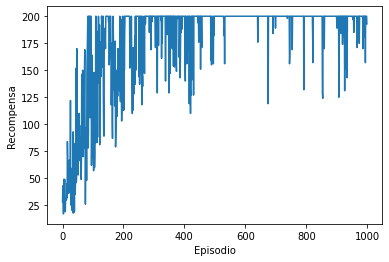

In [ ]:
import matplotlib.pyplot as plt
plt.plot(recompensas_totales)
plt.xlabel('Episodio')
plt.ylabel('Recompensa')
plt.show()

### Ejercicios

* Explica que significa el gráfico anterior
* Escribe líneas  de código para ver cómo funciona la política aprendida en $100$ episodios nuevos.

In [ ]:
# Tu código

### MDP

Desarrollado sobre una cadena de Markov, un MDP involucra un agente y un proceso de toma de decisiones. Sigamos adelante con el desarrollo de un MDP y el cálculo de la función de valor bajo una política óptima.

Además de un conjunto de estados posibles, $S = \{s_0, s_1, \dots, s_m\}$, un MDP se define mediante un conjunto de acciones, $A = \{a_0, a_1, \dots, a_n\}$, un modelo de transición $T(s, a, s')$,  una función de recompensa $R(s)$ y un factor de descuento $\gamma$. 

La matriz de transición $T(s, a, s')$ contiene las probabilidades de tomar la acción $a$ desde el estado $s$ y luego aterrizar en $s'$. El factor de descuento $\gamma$ controla el tradeoff entre las recompensas futuras y las inmediatas. 

Realicemos un MDP  que tiene dos acciones, `a0 trabajar` y `a1 relajarse`. Construyamos la matriz de transición $3 * 2 * 3$,  `T(s, a, s')` con Pytorch:

In [ ]:
import torch


T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]]
                 )

Esto significa, por ejemplo, que cuando se toma la acción `a1 relajarse` desde el estado `s0`, hay un $60\%$ de probabilidad de que se convierta en irse a dormir `s1` (tal vez te canses) y hay un $30\%$ de probabilidad de que se convierta en jugar juego `s2` (tal vez quieras irte a relajar), y que hay un $10\%$ de posibilidades de seguir estudiando. Definimos la función de recompensa como $[+1, 0, -1]$ para tres estados, para compensar el trabajo duro.

La política óptima, en este caso, es elegir un `a0 trabajo` para cada paso. Además, para empezar, elegimos $0.5$ como factor de descuento. 

Definimos la función de recompensa y el factor de descuento: 

In [ ]:
R = torch.tensor([1., 0, -1.])
gamma = 0.5

La política óptima en este caso es seleccionar la acción a0 en todas las circunstancias: 

In [ ]:
accion = 0

Calculamos el valor `V` de la política óptima utilizando el
método de la matriz de inversión en la siguiente función en Pytorch y el uso de las ecuaciones de Bellman.

In [ ]:
def cal_valor_matriz_inversion(gamma, matriz_trans, recompensas):
  inv = torch.inverse(torch.eye(recompensas.shape[0]) - gamma * matriz_trans)
  V = torch.mm(inv, recompensas.reshape(-1, 1))
  return V

Alimentamos todas las variables que tenemos a la función, incluidas las probabilidades de transición asociadas con la acción `a0`: 

In [ ]:
matriz_trans= T[:, accion]
V = cal_valor_matriz_inversion(gamma, matriz_trans, R)
print("La funcion de valor bajo la politica optima es :\n{}".format(V))

La funcion de valor bajo la politica optima es :
tensor([[ 1.6787],
        [ 0.6260],
        [-0.4820]])


### Ejercicio

Realiza experimentos con diferentes valores de descuento $\texttt{gamma}$ por lo menos dos. Anota y explica los resultados.

In [ ]:
## Tus respuestas

En este proceso de MDP simplificado, la política óptima, es decir, la política que logra la recompensa total más alta, es elegir la acción `a0` en todos los pasos. 

Además, las acciones tomadas en pasos individuales no serán necesariamente las mismas. Suelen depender de los estados. Entonces, tendremos que resolver un MDP encontrando la política óptima en casos reales.

La función de valor de una política mide qué tan bueno es para un agente estar en cada estado, dada la política que se está siguiendo. Cuanto mayor sea el valor, mejor será el estado.



### Evaluación de políticas

La evaluación de políticas es un algoritmo iterativo. Comienza con valores de política arbitrarios y luego actualiza iterativamente los valores según la ecuación de expectativas de Bellman hasta que convergen. En cada iteración, el valor de una política, π, para un estado, s, se actualiza de la siguiente manera:

$$V(s)= \sum_{a}\pi(s, a)\biggl[R(s,a) + \gamma\sum_{s'}T(s,a, s')V(s')\biggr]$$

Aquí, $\pi(s, a)$ denota la probabilidad de tomar la acción $a$ en el estado $s$ bajo la política $\pi$. $T(s, a, s')$ es la probabilidad de transición del estado $s$ al estado $s'$ al realizar la acción $a$ y $R(s, a)$ es la recompensa recibida en el estado $s$ al realizar la acción $a$.

Hay dos formas de finalizar un proceso de actualización iterativo. 

Una es establecer un número fijo de iteraciones, como $1.000$ y $10.000$ que a veces pueden ser difíciles de controlar.

 Otro implica especificar un umbral (generalmente $0.0001, 0.00001$ o algo similar) y terminar el proceso solo si los valores de todos los estados cambian en un grado menor que el umbral especificado.

Este es un enfoque iterativo convergente simple, en la familia de programación dinámica, o para ser más específico deprogramación dinámica aproximada. Comienza con suposiciones aleatorias en cuanto a los valores y luego los actualiza iterativamente de acuerdo con la ecuación de expectativa de Bellman hasta que convergen. 

In [ ]:
import torch

T = torch.tensor([[[0.8, 0.1, 0.1],
                   [0.1, 0.6, 0.3]],
                  [[0.7, 0.2, 0.1],
                   [0.1, 0.8, 0.1]],
                  [[0.6, 0.2, 0.2],
                   [0.1, 0.4, 0.5]]]
                 )

R = torch.tensor([1., 0, -1.])

gamma = .5
umbral = 0.0001

politica_optima = torch.tensor([[1.0, 0.0],
                               [1.0, 0.0],
                               [1.0, 0.0]])


Desarrolla una función de evaluación de políticas que tome una política, una matriz de transición, recompensas, factor de descuento y un umbral y calcule la función de valor: 

In [ ]:
def evaluacion_politica(politica, matriz_trans, recompensas, gamma, umbral):
  n_estado = politica.shape[0]
  V = torch.zeros(n_estado)
  while True:
    V_temp = torch.zeros(n_estado)
    for estado, acciones in enumerate(politica):
      for accion, prob_accion in enumerate(acciones):
        V_temp[estado] += prob_accion* (R[estado] + gamma * torch.dot(matriz_trans[estado, accion], V))
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    if max_delta <= umbral:
      break
  return V


En este paso la función de evaluación de políticas realiza las siguientes tareas: Inicializa los valores de política como todos ceros. Actualiza los valores según la ecuación de expectativas de Bellman.

Calcula el cambio máximo de los valores en todos los estados. Si el cambio máximo es mayor que el umbral, sigue actualizando los valores. De lo contrario, finaliza el proceso de evaluación y devuelve los últimos valores. Dado que la evaluación de políticas utiliza una aproximación iterativa, su resultado podría no ser exactamente el mismo que el resultado del método de inversión de matrices, que utiliza el cálculo exacto. 


Ahora conectemos la política óptima y todas las demás variables: 

In [ ]:
V = evaluacion_politica(politica_optima, T, R, gamma, umbral)
print("La funcion de valor bajo la politica optimal es:\n{}".format(V))

La funcion de valor bajo la politica optimal es:
tensor([ 1.6786,  0.6260, -0.4821])


### Ejercicio 

Realiza el mismo procedimiento, bajo una política aleatoria.

In [ ]:
# Tu respuesta

Para mirar más de cerca, también trazamos los valores de las políticas a lo largo de todo el proceso de evaluación. Primero necesitamos registrar el valor de cada iteración en la función `evaluacion_politica`: 

In [ ]:
def historia_evaluacion_politica(politica, matriz_trans, recompensas, gamma, umbral):
  n_estado = politica.shape[0]
  V = torch.zeros(n_estado)
  V_his = [V]
  i = 0
  while True:
    V_temp = torch.zeros(n_estado)
    i += 1
    for estado, acciones in enumerate(politica):
      for accion, prob_accion in enumerate(acciones):
        V_temp[estado] += prob_accion * (R[estado] + gamma * torch.dot(matriz_trans[estado, accion], V))
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    V_his.append(V)
    if max_delta <= umbral:
      break
  return V, V_his

In [ ]:
V, V_historia = historia_evaluacion_politica(politica_optima, T, R, gamma, umbral)

Luego dibujamos el historial de valores resultante usando las siguientes líneas de código: 

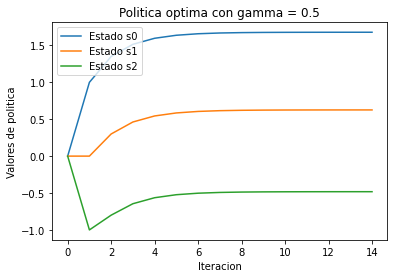

In [ ]:
import matplotlib.pyplot as plt
s0, = plt.plot([v[0] for v in V_historia])
s1, = plt.plot([v[1] for v in V_historia])
s2, = plt.plot([v[2] for v in V_historia])
plt.title('Politica optima con gamma = {}'.format(str(gamma)))
plt.xlabel('Iteracion')
plt.ylabel('Valores de politica')
plt.legend([s0, s1, s2],
           ["Estado s0",
            "Estado s1",
            "Estado s2"], loc="upper left")
plt.show()

### Ejercicio

Realiza experimentos con diferentes valores de descuento. ¿ Qué sucede con $\gamma = 0.99, 0.5$.  Explica tus resultados.

In [ ]:
## Tus respuestas

### FrozenLake

Las políticas óptimas para los MDP que hemos tratado hasta ahora son bastante intuitivas. Sin embargo, no será tan sencillo en la mayoría de los casos, como en el entorno `FrozenLake`. 

FrozenLake es un entorno con un espacio de estado discreto. Se trata de mover a un agente desde la ubicación inicial a la ubicación objetivo en un mundo de cuadrícula y al mismo tiempo, evitar trampas. 

Ver: [https://gym.openai.com/envs/FrozenLake-v0/](https://gym.openai.com/envs/FrozenLake-v0/).

In [ ]:
import gym
import torch


env = gym.make("FrozenLake-v0")
n_estado = env.observation_space.n
print(n_estado)
n_accion = env.action_space.n
print(n_accion)

env.reset()
env.render()

nuevo_estado, recompensa, realizado, info = env.step(1)
env.render()

print(nuevo_estado)
print(recompensa)
print(realizado)
print(info)

16
4

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
0
0.0
False
{'prob': 0.3333333333333333}


### Iteración de políticas

Otro enfoque para resolver un MDP es mediante el uso de un algoritmo de iteración de políticas.

Un algoritmo de iteración de políticas se puede subdividir en dos componentes: evaluación de políticas y mejora de políticas. Comienza con una política arbitraria y en cada iteración, primero calcula los valores de la política dada la política más reciente, según la ecuación de expectativas de Bellman, luego extrae una política mejorada de los valores de política resultantes, basándose en la ecuación de optimalidad de Bellman. 

En la evaluación de políticas, los valores para una política determinada (no la óptima) se calculan con base en la ecuación de expectativas de Bellman hasta que convergen:

$$V(s) = \sum_{s'}T(s,a s')\biggl[R(s,a, s') + \gamma V(s') \biggr]$$

Aquí, $a = \pi(s)$, es la acción tomada bajo la política $\pi$ en el estado $s$. 

En la mejora de políticas, la política se actualiza utilizando los valores de política convergentes resultantes, según la ecuación de optimalidad de Bellman:

$$V(s) = \arg \max_{a}\sum_{s'}T(s,a s')\biggl[R(s,a, s') + \gamma V(s') \biggr]$$

Esto repite los pasos de evaluación y mejora de políticas hasta que la política converge. En la convergencia, la última política y su función de valor son la política óptima y la función de valor óptima 


Desarrollemos un algoritmo de iteración de políticas y usémoslo para resolver el entorno `FrozenLake`.

In [ ]:
gamma = 0.99
umbral = 0.0001

def evaluacion_politica(env, politica, gamma, umbral):
  n_estado = politica.shape[0]
  V = torch.zeros(n_estado)
  while True:
    V_temp = torch.zeros(n_estado)
    for estado in range(n_estado):
      accion = politica[estado].item()
      for prob_trans, nuevo_estado, recompensa, _ in env.env.P[estado][accion]:
        V_temp[estado] += prob_trans * (recompensa + gamma * V[nuevo_estado])
    max_delta = torch.max(torch.abs(V - V_temp))
    V = V_temp.clone()
    if max_delta <= umbral:
      break
  return V


A continuación, desarrollamos el segundo componente principal del algoritmo de iteración de políticas, la parte de mejora de políticas: 

In [ ]:
def mejora_politicas(env, V, gamma):
  n_estado = env.observation_space.n
  n_accion = env.action_space.n
  politica = torch.zeros(n_estado)
  for estado in range(n_estado):
    v_acciones = torch.zeros(n_accion)
    for accion in range(n_accion):
      for prob_trans, nuevo_estado, recompensa, _ in env.env.P[estado][accion]:
        v_acciones[accion] += prob_trans * (recompensa + gamma * V[nuevo_estado])
    politica[estado] = torch.argmax(v_acciones)
  return politica

Esto extrae una política mejorada de los valores de política dados, basada en la ecuación de optimalidad de Bellman. Ahora que tenemos ambos componentes listos, desarrollamos el algoritmo de iteración de políticas de la siguiente manera: 

In [ ]:
def iteracion_politica(env, gamma, umbral):
  n_estado = env.observation_space.n
  n_accion = env.action_space.n
  politica = torch.randint(high=n_accion, size=(n_estado,)).float()
  while True:
    V = evaluacion_politica(env, politica, gamma, umbral)
    politica_mejorada = mejora_politicas(env, V, gamma)
    if torch.equal(politica_mejorada, politica):
      return V, politica_mejorada
    politica = politica_mejorada

Conectamos el entorno, el factor de descuento y el umbral de convergencia. Hemos obtenido los valores óptimos y la política óptima. Echemos un vistazo:

In [ ]:
V_optima, politica_optima = iteracion_politica(env, gamma, umbral)
print('Valores optimos:\n{}'.format(V_optima))
print('Politica optima :\n{}'.format(politica_optima))

Valores optimos:
tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])
Politica optima :
tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])


### Evaluación de políticas de Monte Carlo


Un algoritmo de aprendizaje por refuerzo que necesita un MDP se clasifica como un algoritmo **basado en modelos**. Por otro lado, uno sin el requisito de conocimiento previo de transiciones y recompensas se denomina algoritmo **sin modelo**. El aprendizaje por refuerzo basado en Monte Carlo (MC) es un enfoque sin modelos.

En esta sección evaluaremos la función de valor usando el método de Monte Carlo. Usaremos el entorno `FrozenLake` asumiendo que no tenemos acceso a sus matrices de transición y recompensa. Recuerda que los retornos de un proceso, que son las recompensas totales a largo plazo, son los siguientes:

$$R_t = \sum_k \gamma^k R_{t + k +1}$$

La evaluación de la política Montecarlo utiliza el rendimiento medio empírico en lugar del rendimiento esperado para estimar la función de valor. 

Hay dos formas de realizar la evaluación de políticas de CM. 

Una es la predicción de MC en la primera visita, que promedia los retornos solo para la primera aparición de un estado `s`, en un episodio. Otro es la predicción MC de cada visita, que promedia los retornos por cada ocurrencia de un estado `s`, en un episodio. 

Obviamente, la predicción de MC en la primera visita tiene muchos menos cálculos que la versión de cada visita, por lo que se usa con más frecuencia. 

In [ ]:
import torch
import gym

env = gym.make('FrozenLake-v0')

def correr_episodio(env, politica):
  estado = env.reset()
  recompensas = []
  estados = [estado]
  realizado = False
  while not realizado:
    accion = politica[estado].item()
    estado, recompensa, realizado, info = env.step(accion)
    estados.append(estado)
    recompensas.append(recompensa)
    if realizado:
      break
  estados = torch.tensor(estados)
  recompensas = torch.tensor(recompensas)
  return estados, recompensas

Nuevamente, en el entorno de Monte Carlo, debemos realizar un seguimiento de los estados y las recompensas de todos los pasos, ya que no tenemos acceso al entorno completo, incluidas las probabilidades de transición y la matriz de recompensas.

Ahora, definimos la función que evalúa la política dada con MC de primera visita: 


In [ ]:
def prediccion_mc_primera_visita(env, politica, gamma, n_episodio):
  n_estado = politica.shape[0]
  V = torch.zeros(n_estado)
  N = torch.zeros(n_estado)
  for episodio in range(n_episodio):
    estados_t, recompensas_t = correr_episodio(env, politica)
    retorno_t = 0
    primera_visita = torch.zeros(n_estado)
    R = torch.zeros(n_estado)
    for estado_t, recompensa_t in zip(reversed(estados_t)[1:], reversed(recompensas_t)):
      retorno_t = gamma * retorno_t + recompensa_t
      R[estado_t] = retorno_t
      primera_visita[estado_t] = 1
    for estado in range(n_estado):
      if primera_visita[estado] > 0:
        V[estado] += R[estado]
        N[estado] += 1
  for estado in range(n_estado):
    if N[estado] > 0:
      V[estado] = V[estado] / N[estado]
  return V

Especificamos la tasa de descuento como $1$ para facilitar el cálculo y simulamos $10.000$ episodios y usamos la política óptima calculada y usamos en la función MC de primera visita, junto con otros parámetros:  

In [ ]:
gamma = 1
n_episodio = 10000
politica_optima = torch.tensor([0., 3., 3., 3., 0., 3., 2., 3., 3., 1., 0., 3., 3., 2., 1., 3.])
valor = prediccion_mc_primera_visita(env, politica_optima, gamma, n_episodio)

print('La funcion de valor calculada por la predicción MC en la primera visita:\n', valor)

La funcion de valor calculada por la predicción MC en la primera visita:
 tensor([0.7427, 0.5083, 0.5021, 0.4556, 0.7427, 0.0000, 0.3890, 0.0000, 0.7427,
        0.7442, 0.6745, 0.0000, 0.0000, 0.8037, 0.8957, 0.0000])


En la predicción basada en MC, no es necesario conocer el modelo completo del entorno. De hecho, en la mayoría de los casos del mundo real, la matriz de transición y la matriz de recompensa no se conocen de antemano o son extremadamente difíciles de obtener. 

El aprendizaje por refuerzo sin modelos consiste en aprender de la experiencia interactuando con el entorno.

En nuestro caso, solo consideramos lo que se pudo observar, que incluía el nuevo estado y la recompensa en cada paso e hicimos predicciones utilizando el método de Monte Carlo. Ten en cuenta que cuantos más episodios simulemos, más predicciones podremos obtener. 

Decidimos realizar también la predicción de MC de cada visita para la política óptima de FrozenLake.

In [ ]:
def prediccion_mc_cada_visita(env, politica, gamma, n_episodio):
  n_estado = politica.shape[0]
  V = torch.zeros(n_estado)
  N = torch.zeros(n_estado)
  R = torch.zeros(n_estado)
  for episodio in range(n_episodio):
    estados_t, recompensas_t = correr_episodio(env, politica)
    retorno_t = 0
    for estado_t, recompensa_t in zip(reversed(estados_t)[1:], reversed(recompensas_t)):
      retorno_t = gamma * retorno_t + recompensa_t
      R[estado_t] += retorno_t
      N[estado_t] += 1
  for estado in range(n_estado):
    if N[estado] > 0:
      V[estado] = R[estado] / N[estado]
  return V

Calcula el valor introduciendo la política y otros parámetros en la función: 

In [ ]:
valor = prediccion_mc_cada_visita(env, politica_optima, gamma, n_episodio)
print('La funcion de valor calculada por la predicción MC en cada visita:\n', valor)

La funcion de valor calculada por la predicción MC en cada visita:
 tensor([0.6156, 0.4283, 0.3790, 0.3258, 0.6182, 0.0000, 0.3654, 0.0000, 0.6389,
        0.6766, 0.6387, 0.0000, 0.0000, 0.7659, 0.8759, 0.0000])


### Control de Monte Carlo con política

La predicción de Monte Carlo se utiliza para evaluar el valor de una política determinada, mientras que el control de Monte Carlo (control MC) se utiliza para encontrar la política óptima cuando no se proporciona dicha política. 

Básicamente, existen categorías de control de MC: con política, fuera de política. 

Los **métodos con políticas** aprenden sobre la política óptima ejecutando la política y evaluándola y mejorándola, mientras que los **métodos fuera de política** aprenden sobre la política óptima utilizando datos generados por otra política. 

La forma en que funciona el control de MC en la política es bastante similar a la iteración de políticas en la programación dinámica, que tiene dos fases, evaluación y mejora:


- En la fase de evaluación, en lugar de evaluar la función de valor (también llamada valor de estado o utilidad), evalúa el para valor-acción. El valor-acción se denomina con más frecuencia Q-función, que es la utilidad de un par de estado-acción, $(s,a)$ al tomar la acción $a$ en el estado $s$ bajo una política determinada. Una vez más, la evaluación se puede realizar en la primera visita o en cada visita.

* En la fase de mejora, la política se actualiza asignando la acción óptima a cada estado:

$$\pi(s)= \arg \max_{a}Q(s,a)$$

La política óptima se obtendrá alternando dos fases para un gran número de iteraciones. 

In [ ]:
import torch
import gym

env = gym.make('Blackjack-v0')

def correr_episodio(env, Q, n_accion):
  estado = env.reset()
  recompensas = []
  acciones = []
  estados = []
  realizado = False
  accion = torch.randint(0, n_accion, [1]).item()
  while not realizado:
    acciones.append(accion)
    estados.append(estado)
    estado, recompensa, realizado, info = env.step(accion)
    recompensas.append(recompensa)
    if realizado:
      break
    accion = torch.argmax(Q[estado]).item()
  return estados, acciones, recompensas


Ahora, desarrollamos el algoritmo de control de MC basado en políticas: 

In [ ]:
from collections import defaultdict

def mc_control_con_politica(env, gamma, n_episodio):
  n_accion = env.action_space.n
  R_suma = defaultdict(float)
  N = defaultdict(int)
  Q = defaultdict(lambda: torch.empty(n_accion))
  for episodio in range(n_episodio):
    estados_t, acciones_t, recompensas_t = correr_episodio(env, Q, n_accion)
    retorno_t = 0
    R = {}
    for estado_t, accion_t, recompensa_t in zip(estados_t[::-1], acciones_t[::-1], recompensas_t[::-1]):
      retorno_t = gamma * retorno_t + recompensa_t
      R[(estado_t, accion_t)] = retorno_t
    for accion_estado, retorno_t in R.items():
      estado, accion = accion_estado
      if estado[0] <= 21:
        R_suma[accion_estado] += retorno_t
        N[accion_estado] += 1
        Q[estado][accion] = R_suma[accion_estado] / N[accion_estado]
  politica = {}
  for estado, acciones in Q.items():
    politica[estado] = torch.argmax(acciones).item()
  return Q, politica


Realizamos un control de MC con política para obtener la Q-función óptima y la política:

In [ ]:
gamma = 1
n_episodio = 500000

Q_optimo, politica_optima = mc_control_con_politica(env, gamma, n_episodio)
print(politica_optima)

{(14, 10, False): 1, (12, 10, False): 1, (13, 4, False): 0, (11, 1, False): 1, (11, 10, False): 1, (13, 6, False): 0, (14, 2, False): 0, (8, 2, False): 1, (13, 10, False): 1, (16, 2, False): 0, (20, 10, False): 0, (10, 5, False): 1, (19, 10, True): 0, (20, 7, False): 0, (20, 3, False): 0, (10, 3, False): 1, (20, 8, False): 0, (14, 9, True): 1, (18, 5, False): 0, (20, 6, False): 0, (12, 6, False): 1, (16, 5, False): 0, (6, 5, False): 1, (21, 10, True): 0, (9, 5, False): 1, (17, 5, False): 0, (15, 5, False): 0, (14, 8, False): 1, (13, 10, True): 1, (16, 8, False): 0, (13, 8, False): 1, (15, 10, False): 1, (17, 1, False): 0, (14, 1, False): 1, (20, 9, False): 0, (10, 8, False): 1, (7, 8, False): 1, (9, 1, False): 1, (21, 9, True): 0, (15, 8, False): 1, (19, 10, False): 0, (7, 6, False): 1, (20, 2, False): 0, (17, 2, False): 0, (19, 5, False): 0, (20, 10, True): 0, (18, 7, True): 0, (15, 3, False): 0, (10, 10, False): 1, (13, 1, False): 1, (17, 6, False): 0, (17, 10, False): 0, (14, 5, Fal

También podemos calcular la función de valor de la política óptima e imprimir el valor óptimo de la siguiente manera:

In [ ]:
valor_optimo = defaultdict(float)
for estado, accion_valor in Q_optimo.items():
  valor_optimo[estado] = torch.max(accion_valor).item()

print('La funcion valor de la politica optima es:\n', valor_optimo)


La funcion valor de la politica optima es:
 defaultdict(<class 'float'>, {(14, 10, False): -0.4922714829444885, (12, 10, False): -0.4272904098033905, (13, 4, False): -0.21922731399536133, (11, 1, False): -0.1403985470533371, (11, 10, False): 0.054242003709077835, (13, 6, False): -0.1771620512008667, (14, 2, False): -0.30506274104118347, (8, 2, False): -0.009600000455975533, (13, 10, False): -0.45511728525161743, (16, 2, False): -0.30158731341362, (20, 10, False): 0.43140530586242676, (10, 5, False): 0.23613962531089783, (19, 10, True): 0.023955773562192917, (20, 7, False): 0.7788109183311462, (20, 3, False): 0.645345151424408, (10, 3, False): 0.23236514627933502, (20, 8, False): 0.7851551175117493, (14, 9, True): -0.003921568859368563, (18, 5, False): 0.2372152954339981, (20, 6, False): 0.7010210752487183, (12, 6, False): -0.1860976666212082, (16, 5, False): -0.1664591133594513, (6, 5, False): 0.0, (21, 10, True): 0.8879533410072327, (9, 5, False): 0.1575433909893036, (17, 5, False): -

### Control Monte Carlo sin política

Otro enfoque basado en MC para resolver un MDP es el control sin política.

Los métodos sin política optimiza la política de destino $\pi$, utilizando datos generados por otra política, denominada política de comportamiento `b`. La política objetivo realiza explotación todo el tiempo, mientras que la política de comportamiento es para fines de exploración. Esto significa que la política objetivo es greedy con respecto a su Q-función actual y la política de comportamiento genera un comportamiento para que la política objetivo tenga datos de los que aprender. 

La política de comportamiento puede ser cualquier cosa siempre que todas las acciones en todos los estados se elijan con probabilidades distintas de cero, lo que garantiza que la política de comportamiento puede explorar todas las posibilidades.

Dado que estamos tratando con dos políticas diferentes en el método sin política, solo podemos usar los pasos comunes en los episodios que tienen lugar en ambas políticas. Esto significa que comenzamos con el último paso cuya acción tomada bajo la política de comportamiento es diferente de la acción tomada bajo la política greedy. 

Y para aprender sobre la política objetivo con otra política, usamos una técnica llamada muestreo por importancia, que se usa comúnmente para estimar el valor esperado bajo una distribución, dadas muestras generadas a partir de una distribución diferente. 

La importancia ponderada para un par estado-acción se calcula de la siguiente manera:

$$w_t = \sum_{k =t}[\pi(a_k|s_k)/b(a_k|s_k)]$$

Aquí, $\pi(a_k|s_k)$ es la probabilidad de tomar una acción $a_k$ en el estado $s_k$ bajo la política objetivo,  $b(a_k|s_k)$ es la probabilidad según la política de comportamiento y el peso $w_t$ es la multiplicación de las razones entre esas dos probabilidades desde el paso $t$ hasta el final del episodio. El peso $w_t$ se aplica al retorno en el paso $t$. 

In [ ]:
import torch
import gym

env = gym.make('Blackjack-v0')


def gen_politica_aleatoria(n_accion):
  probs = torch.ones(n_accion)/n_accion
  def funcion_politica(estado):
    return probs
  return funcion_politica

def correr_episodio(env, politica_comportamiento):
  estado = env.reset()
  recompensas = []
  acciones = []
  estados = []
  realizado = False
  while not realizado:
    probs = politica_comportamiento(estado)
    accion = torch.multinomial(probs, 1).item()
    acciones.append(accion)
    estados.append(estado)
    estado, recompensa, realizado, info = env.step(accion)
    recompensas.append(recompensa)
    if realizado:
      break
  return estados, acciones, recompensas





Utilizamos el muestreo de importancia ponderada que se diferencia del muestreo de importancia ordinaria en la forma en que promedia los rendimientos. En lugar de simplemente promediar, toma el promedio ponderado de los retornos: 

$$V_n = (\sum_{k =1}^nw_kR_k)/\sum_{k =1}^{n}w_k$$

In [ ]:
from collections import defaultdict

def mc_control_ponderada_sin_politica(env, gamma, n_episodio, politica_comportamiento):
  n_accion = env.action_space.n
  N = defaultdict(float)
  Q = defaultdict(lambda: torch.empty(n_accion))
  for episodio in range(n_episodio):
    W = 1.
    estados_t, acciones_t, recompensas_t = correr_episodio(env, politica_comportamiento)
    retorno_t = 0.
    for estado_t, accion_t, recomplensa_t in zip(estados_t[::-1], acciones_t[::-1], recompensas_t[::-1]):
      retorno_t = gamma * retorno_t + recomplensa_t
      N[(estado_t, accion_t)] += W
      Q[estado_t][accion_t] += (W / N[(estado_t, accion_t)]) * (retorno_t - Q[estado_t][accion_t])
      if accion_t != torch.argmax(Q[estado_t]).item():
        break
      W *= 1./ politica_comportamiento(estado_t)[accion_t]
  politica = {}
  for estado, acciones in Q.items():
    politica[estado] = torch.argmax(acciones).item()
  return Q, politica


Realizamos la prueba del método con los siguientes parámetros

In [ ]:
gamma = 1
n_episodio = 500000
politica_aleatoria = gen_politica_aleatoria(env.action_space.n)
Q_optimo, politica_optima = mc_control_ponderada_sin_politica(env, gamma, n_episodio, politica_aleatoria)

Hemos resuelto el problema del Blackjack utilizando el control MC sin política con muestreo de importancia ponderada. Es bastante similar al muestreo de importancia, pero en lugar de escalar los retornos por razones y promediar los resultados, escala los retornos utilizando el promedio ponderado.

In [ ]:
def simulacion_episodio(env, politica):
  estado = env.reset()
  realizado = False
  while not realizado:
    accion = politica[estado]
    estado, recompensa, realizado, info = env.step(accion)
  if realizado:
    return recompensa

In [ ]:
n_episodio = 100000
n_optimo_ganador = 0
n_optimo_perdedor = 0

for _ in range(n_episodio):
  recompensa = simulacion_episodio(env, politica_optima)
  if recompensa == 1:
    n_optimo_ganador += 1
  elif recompensa == -1:
    n_optimo_perdedor += 1

print('Probabilidad de ganar bajo una politica optima : {}'.format(n_optimo_ganador/n_episodio))
print('Probabilidad de perder bajo una política optima: {}'.format(n_optimo_perdedor/n_episodio))

Probabilidad de ganar bajo una politica optima : 0.43132
Probabilidad de perder bajo una política optima: 0.47612


##Diferencia temporal 

Si utilizamos MDPs mediante el método de Monte Carlo, que es un enfoque de utilizar modelos, que no requiere conocimiento previo del entorno. Sin embargo, en el aprendizaje MC, la función de valor y la q-función generalmente se actualizan hasta el final de un episodio.  Esto podría ser problemático, ya que algunos procesos son muy largos o incluso no terminan. 

Emplearemos el método de diferencia temporal (TD) para resolver este problema. En el método TD, actualizamos los valores de acción en cada paso de tiempo de un episodio, lo que aumenta significativamente la eficiencia del aprendizaje.


### Cliff Walking 

Es un entorno típico `gym`, con largos episodios sin garantía de terminar. Es un problema de grid con una tabla de `4 * 12`. 

Un agente hace un movimiento hacia arriba, hacia la derecha, hacia abajo y hacia la izquierda en un paso. La pieza inferior izquierda es el punto de partida para el agente,y abajo a la derecha es el punto ganador donde un episodio terminará si se alcanza. Las piezas restantes en la última fila son acantilados (cliffs) donde el agente se restablecerá a la posición inicial después de pisar cualquiera de ellos, pero el episodio continúa. Cada paso que da el agente incurre en una recompensa de `-1`, con la excepción de pisar los acantilados, donde se incurre en una recompensa de `-100`.

In [ ]:
import gym
env = gym.make("CliffWalking-v0")

n_estado = env.observation_space.n
print(n_estado)

48


In [ ]:
n_accion = env.action_space.n
print(n_accion)
env.reset()

4


36

Reseteamos el entorno

In [ ]:
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



Hagamos ahora un movimiento hacia abajo independientemente, aunque no sea transitable:

In [ ]:
nuevo_estado, recompensa, realizado, info = env.step(2)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



El agente se queda quieto. Ahora imprimimos lo que acabamos de obtener:


In [ ]:
print(nuevo_estado)

36


Nuevamente, cada movimiento incurre en una recompensa de `-1`:

In [ ]:
print(realizado)

False


El episodio no está realizado ya que el agente aún no ha alcanzado su objetivo. Esto significa que el movimiento es determinista.

In [ ]:
print(info)

{'prob': 1.0}


Ahora, realicemos un movimiento hacia arriba ya que es transitable:

In [ ]:
nuevo_estado, recompensa, realizado, info = env.step(0)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [ ]:
print(nuevo_estado)

24


El agente se mueve hacia arriba:

In [ ]:
print(recompensa)

-1


Ahora intentemos hacer un movimiento hacia la derecha y hacia abajo:


In [ ]:
nuevo_estado, recompensa, realizado, info = env.step(1)
nuevo_estado, recompensa, realizado, info = env.step(2)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T



El agente pisó el acantilado, por lo que se reinició al punto de partida y recibió una recompensa de `-100`:

In [ ]:
print(nuevo_estado)
print(recompensa)
print(realizado)

36
-100
False


Finalmente, intentemos tomar el camino más corto para alcanzar la meta:

In [ ]:
nuevo_estado, recompensa, realizado, info = env.step(0)
for _ in range(11):
  env.step(1)
nuevo_estado, recompensa, realizado, info = env.step(2)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x



In [ ]:
print(nuevo_estado)
print(recompensa)
print(realizado)

47
-1
True


Renderizamos el entorno y se tiene una matriz de `4 * 12`  que representa grid con una pieza inicial `(x)` que indica donde está parado el agente, la pieza  objetivo `(T)`, `10` fichas de acantilado (C) y fichas regulares `(o)`.

Se han realizado varios movimientos y vimos los diversos resultados de estos movimientos y las recompensas recibidas. Un episodio de Cliff Walking puede ser muy largo o incluso interminable, ya que pisar un acantilado reiniciará el juego. Y cuanto antes se alcance la meta, mejor, porque cada paso dará como resultado una recompensa de `-1` o `-100`. 

### Algoritmo Q-Learning

El aprendizaje por diferencia temporal (TD) también es un algoritmo de aprendizaje sin modelos, al igual que el aprendizaje MC. La q-función  se actualiza al final de todo el episodio en el aprendizaje de MC. 

La principal ventaja del aprendizaje TD es que actualiza la q-función  para cada paso de un episodio.

Q-learning es un algoritmo de aprendizaje fuera de las políticas. Actualiza la q-función basándose en la siguiente ecuación:

$$Q(s,a) = Q(s,a)  + \alpha(r + \gamma \max_{a'} Q(s', a') -Q(s,a))$$

Aquí, $s'$ es el estado resultante después de realizar una acción  $a$, en el estado $s$, $r$ es la recompensa asociada, $\alpha$ es la tasa de aprendizaje y $\gamma$ es el factor de descuento. 

Además, significa que la política de comportamiento es greedy, donde se selecciona el q-valor  más alto entre los del estado $s'$ para generar datos de aprendizaje. 

En Q-learning, las acciones se toman de acuerdo con la `política épsilon-greedy`.

####  La política épsilon-greedy 

Consiste en que el agente casi siempre tomará la mejor acción posible dada la información que posee. Sin embargo, de vez en cuando, con una probabilidad de $\epsilon$, el agente tomará una acción completamente al azar. De esta forma, si tras la primera acción el agente ha obtenido una recompensa positiva, no se quedará atascado escogiendo esa misma acción todo el rato. 

Con probabilidad $\epsilon$ el agente explorará otras opciones. Este valor $\epsilon$ lo decidiremos nosotros y será la forma que tengamos de equilibrar el problema de exploración y explotación. 


In [ ]:
import torch
import gym

env = gym.make('CliffWalking-v0')


def gen_politica_epsilon_greedy(n_accion, epsilon):
    def funcion_politica(estado, Q):
        probs = torch.ones(n_accion) * epsilon / n_accion
        mejor_accion = torch.argmax(Q[estado]).item()
        probs[mejor_accion] += 1.0 - epsilon
        accion = torch.multinomial(probs, 1).item()
        return accion
    return funcion_politica


from collections import defaultdict

def q_learning(env, gamma, n_episodios, alpha):
    n_accion = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_accion))
    for episodio in range(n_episodios):
        estado = env.reset()
        realizado = False
        while not realizado:

            accion = politica_epsilon_greedy(estado, Q)
            prox_estado, recompensa, realizado, info = env.step(accion)
            td_delta = recompensa + gamma * torch.max(Q[prox_estado]) - Q[estado][accion]
            Q[estado][accion] += alpha * td_delta

            longitud_episodio[episodio] += 1
            recompensa_episodio_total[episodio] += recompensa

            if realizado:
                break
            estado = prox_estado

    politica = {}
    for estado, acciones in Q.items():
        politica[estado] = torch.argmax(acciones).item()
    return Q, politica

gamma = 1
n_episodios = 500
alpha = 0.4
epsilon = 0.1

politica_epsilon_greedy = gen_politica_epsilon_greedy(env.action_space.n, epsilon)

longitud_episodio = [0] * n_episodios
recompensa_episodio_total = [0] * n_episodios

q_optima, politica_optima = q_learning(env, gamma, n_episodios, alpha)
print('Politica optima:\n', politica_optima)

Politica optima:
 {36: 0, 24: 1, 12: 1, 25: 1, 13: 1, 1: 2, 2: 1, 3: 1, 4: 3, 5: 1, 6: 2, 7: 1, 8: 2, 9: 1, 10: 1, 11: 2, 23: 2, 22: 2, 21: 2, 20: 2, 35: 2, 34: 1, 33: 1, 32: 1, 19: 1, 18: 2, 17: 1, 16: 2, 15: 1, 14: 2, 31: 1, 30: 1, 29: 1, 28: 1, 27: 1, 26: 1, 0: 0, 47: 0}



Implementamos la política épsilon-greedy toma un parámetro, $\epsilon$, con un valor de $0$ a $1$ y $\vert A \vert$, el número de acciones posibles. Cada acción se toma con una probabilidad de $\epsilon/|A|$ y la acción con el valor de acción de estado más alto se elige con una probabilidad de $1-\epsilon + \epsilon/|A|$.

Luego realizamos Q-learning en las siguientes tareas:

* Inicializamos una q-tabla  con todos ceros. 

* En cada episodio, dejamos que el agente siga la política épsilon-greedy para elegir qué acción tomar. Y actualizamos la q-función para cada paso.

* Ejecutamos `n_episodios` episodios.

* Obtenemos la política óptima en función de la q-función óptima.


Siguiendo la política óptima, el agente comienza en el estado $36$, luego sube al estado $24$ y luego todo el camino a la derecha hasta el estado $35$ y finalmente alcanza la meta bajando.


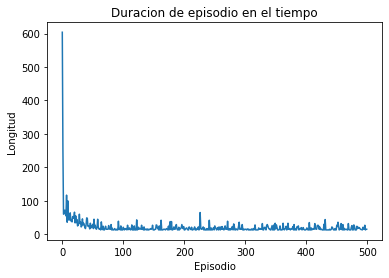

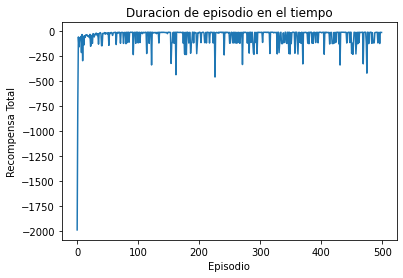

In [ ]:
import matplotlib.pyplot as plt
plt.plot(longitud_episodio)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Longitud')
plt.show()


plt.plot(recompensa_episodio_total)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

###  SARSA

 Q-learning es un algoritmo de aprendizaje TD fuera de la política. Ahora resolveremos un MDP con un algoritmo de aprendizaje TD basado en políticas, llamado State-Action-Reward-State-Action (SARSA)(SARSA).

Al igual que Q-learning, SARSA se centra en los valores de acción-estado. Actualiza la q-función basándose en la siguiente ecuación:

$$ Q(s,a) = Q(s,a)  + \alpha(r + \gamma Q(s', a') -Q(s,a))$$

Aquí, $s'$ es el estado resultante después de realizar la acción $a$ en el estado $s$, $r$ es la recompensa asociada, $\alpha$ es la tasa de aprendizaje, y $\gamma$ es el factor de descuento. 

En Q-learning, se utiliza una política de comportamiento greedy, para actualizar el q-valor. En SARSA, simplemente retomamos la siguiente acción $a'$, siguiendo también una política épsilon-greedy para actualizar el q-valor  y la acción $a'$ se toma en el siguiente paso. 

Por lo tanto, SARSA es un algoritmo de política.

In [ ]:
import torch
import gym

env = gym.make('Taxi-v3')

def gen_politica_epsilon_greedy(n_accion, epsilon):
    def funcion_politica(estado, Q):
        probs = torch.ones(n_accion) * epsilon / n_accion
        mejor_accion = torch.argmax(Q[estado]).item()
        probs[mejor_accion] += 1.0 - epsilon
        accion = torch.multinomial(probs, 1).item()
        return accion
    return funcion_politica


from collections import defaultdict

def sarsa(env, gamma, n_episodios, alpha):
    n_accion = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_accion))
    for episodio in range(n_episodios):
        estado = env.reset()
        realizado = False
        accion = politica_epsilon_greedy(estado, Q)
        while not realizado:
            prox_estado, recompensa, realizado, info = env.step(accion)
            prox_accion = politica_epsilon_greedy(prox_estado, Q)
  
            td_delta = recompensa + gamma * Q[prox_estado][prox_accion] - Q[estado][accion]
            Q[estado][accion] += alpha * td_delta

            longitud_episodio[episodio] += 1
            recompensa_episodio_total[episodio] += recompensa

            if realizado:
                break
            estado = prox_estado
            accion = prox_accion

    politica = {}
    for estado, acciones in Q.items():
        politica[estado] = torch.argmax(acciones).item()
    return Q, politica

gamma = 1
n_episodios = 500
alpha = 0.4
epsilon = 0.1

politica_epsilon_greedy = gen_politica_epsilon_greedy(env.action_space.n, epsilon)

longitud_episodio = [0] * n_episodios
recompensa_episodio_total = [0] * n_episodios

q_optima, politica_optima = sarsa(env, gamma, n_episodios, alpha)

Realizamos una visualización de los resultados: la duración y la recompensa total de cada episodio a lo largo del tiempo para verificar si el modelo converge y la duración de los episodios a lo largo del tiempo. 


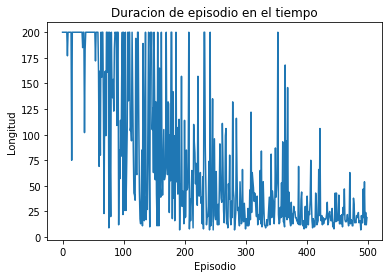

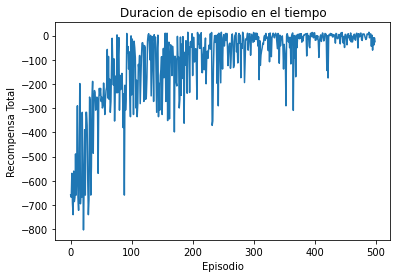

In [ ]:
import matplotlib.pyplot as plt
plt.plot(longitud_episodio)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Longitud')
plt.show()


plt.plot(recompensa_episodio_total)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

Este modelo de SARSA funciona bien, pero no es necesariamente el mejor.  El entorno `Taxi` es un problema de red relativamente complejo con $500$ estados discretos y `6` acciones posibles. El algoritmo SARSA optimiza la q-función  en cada paso de un episodio al aprender y optimizar la política objetivo. 

Obtenemos información sobre el entorno durante el proceso de aprendizaje y usamos esta información para actualizar los valores de inmediato siguiendo la política de épsilon-greedy.

La búsqueda grid es una forma programática de encontrar el mejor conjunto de valores para hiperparámetros en el aprendizaje por refuerzo. El rendimiento de cada conjunto de hiperparámetros se mide mediante las siguientes tres métricas:

* Recompensa total promedio durante los primeros episodios: queremos obtener la mayor recompensa lo antes posible.

* Duración media de los episodios durante los primeros episodios: queremos que el taxi llegue al destino lo más rápido posible.

* Recompensa promedio por cada paso de tiempo en los primeros episodios: queremos obtener la máxima recompensa lo más rápido posible.


In [ ]:
opciones_alpha = [0.4, 0.5, 0.6]
opciones_epsilon = [0.1, 0.03, 0.01]
n_episodios = 500

for alpha in opciones_alpha:
  for epsilon in opciones_epsilon:
    longitud_episodio = [0] * n_episodios
    recompensa_episodio_total = [0] * n_episodios
    sarsa(env, gamma, n_episodios, alpha)
    recompensa_por_paso = [recompensa/float(step) for recompensa, step in zip(recompensa_episodio_total, longitud_episodio)]
    print('Alpha: {}, epsilon: {}'.format(alpha, epsilon))
    print('Recompensa promedio por {} episodios: {}'.format(n_episodios, sum(recompensa_episodio_total) / n_episodios))
    print('Duracion promedio de {} los episodios: {}'.format(n_episodios, sum(longitud_episodio) / n_episodios))
    print('Recompensa promedio por paso por {} episodios: {}\n'.format(n_episodios, sum(recompensa_por_paso) / n_episodios))

Alpha: 0.4, epsilon: 0.1
Recompensa promedio por 500 episodios: -120.848
Duracion promedio de 500 los episodios: 80.126
Recompensa promedio por paso por 500 episodios: -0.8317539184220967

Alpha: 0.4, epsilon: 0.03
Recompensa promedio por 500 episodios: -111.432
Duracion promedio de 500 los episodios: 75.27
Recompensa promedio por paso por 500 episodios: -0.7749439589410109

Alpha: 0.4, epsilon: 0.01
Recompensa promedio por 500 episodios: -118.492
Duracion promedio de 500 los episodios: 78.43
Recompensa promedio por paso por 500 episodios: -0.8133073414395524

Alpha: 0.5, epsilon: 0.1
Recompensa promedio por 500 episodios: -97.736
Duracion promedio de 500 los episodios: 66.314
Recompensa promedio por paso por 500 episodios: -0.6677825615518626

Alpha: 0.5, epsilon: 0.03
Recompensa promedio por 500 episodios: -108.878
Duracion promedio de 500 los episodios: 72.164
Recompensa promedio por paso por 500 episodios: -0.7886354339232956

Alpha: 0.5, epsilon: 0.01
Recompensa promedio por 500 e

¿Qué crees que sucede aquí?

*Tu respuesta*